# sklearn回归建模

- 何为线性回归
    - 有监督学习 $=>$ 学习样本为 $\mathcal{D}=\left\{\left(\mathbf{x}_i, y_i\right)\right\}_{i=1}^N$
    - 输出/预测的结果yi为连续值变量
    - 需要学习映射 $f: \mathcal{X} \rightarrow \mathcal{Y}$
    - 假定输入 $x$ 和输出 $y$ 之间有线性相关关系
    - 对于给定的 $x$, 预测其输出测阶段

- 测试/预测阶段
    - 预测目标数值的回归问题：$\hat{y}=f(\mathbf{x})$

<div class="sl-block is-focused" data-block-type="image" data-name="image-28a101" style="width: 306.277px; height: 158.401px; left: 715.409px; top: 548.5px;" data-origin-id="026c263fa0bca97aab261a995c230099"><div class="sl-block-content" style="z-index: 34;"><img src="https://cdn.sa.net/2023/12/22/2yQeaWqEjnoPISi.jpg" class="" data-natural-width="1164" data-natural-height="602"></div></div>

## 线性回归

<div class="sl-block is-focused" data-block-type="image" data-name="image-aeeb43" style="width: 471.332px; height: 371.8px; left: 57.284px; top: 331.6px;" data-origin-id="8a66d122de7bbf4d076465f64d185afd"><div class="sl-block-content" style="z-index: 17;"><img src="https://s3.amazonaws.com/media-p.slid.es/uploads/1094055/images/11012965/10_01.png" class="" data-natural-width="734" data-natural-height="579"></div></div>

### 波士顿房价数据集简介

Source: [https://archive.ics.uci.edu/ml/datasets/Housing](https://archive.ics.uci.edu/ml/datasets/Housing)

Attributes:
    
<pre>
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's
</pre>

<div class="sl-block is-focused" data-block-type="image" data-name="image-94d74a" style="width: 505.371px; height: 515.9px; left: 379.036px; top: 110.5px;" data-origin-id="2906c99f8ef3628a99a0e05769efdacb"><div class="sl-block-content" style="z-index: 33;"><img src="https://s3.amazonaws.com/media-p.slid.es/uploads/1094055/images/11017679/pasted-from-clipboard.png" class="" data-natural-width="720" data-natural-height="735"></div></div>

In [2]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### 简单的数据可视化与相关分析

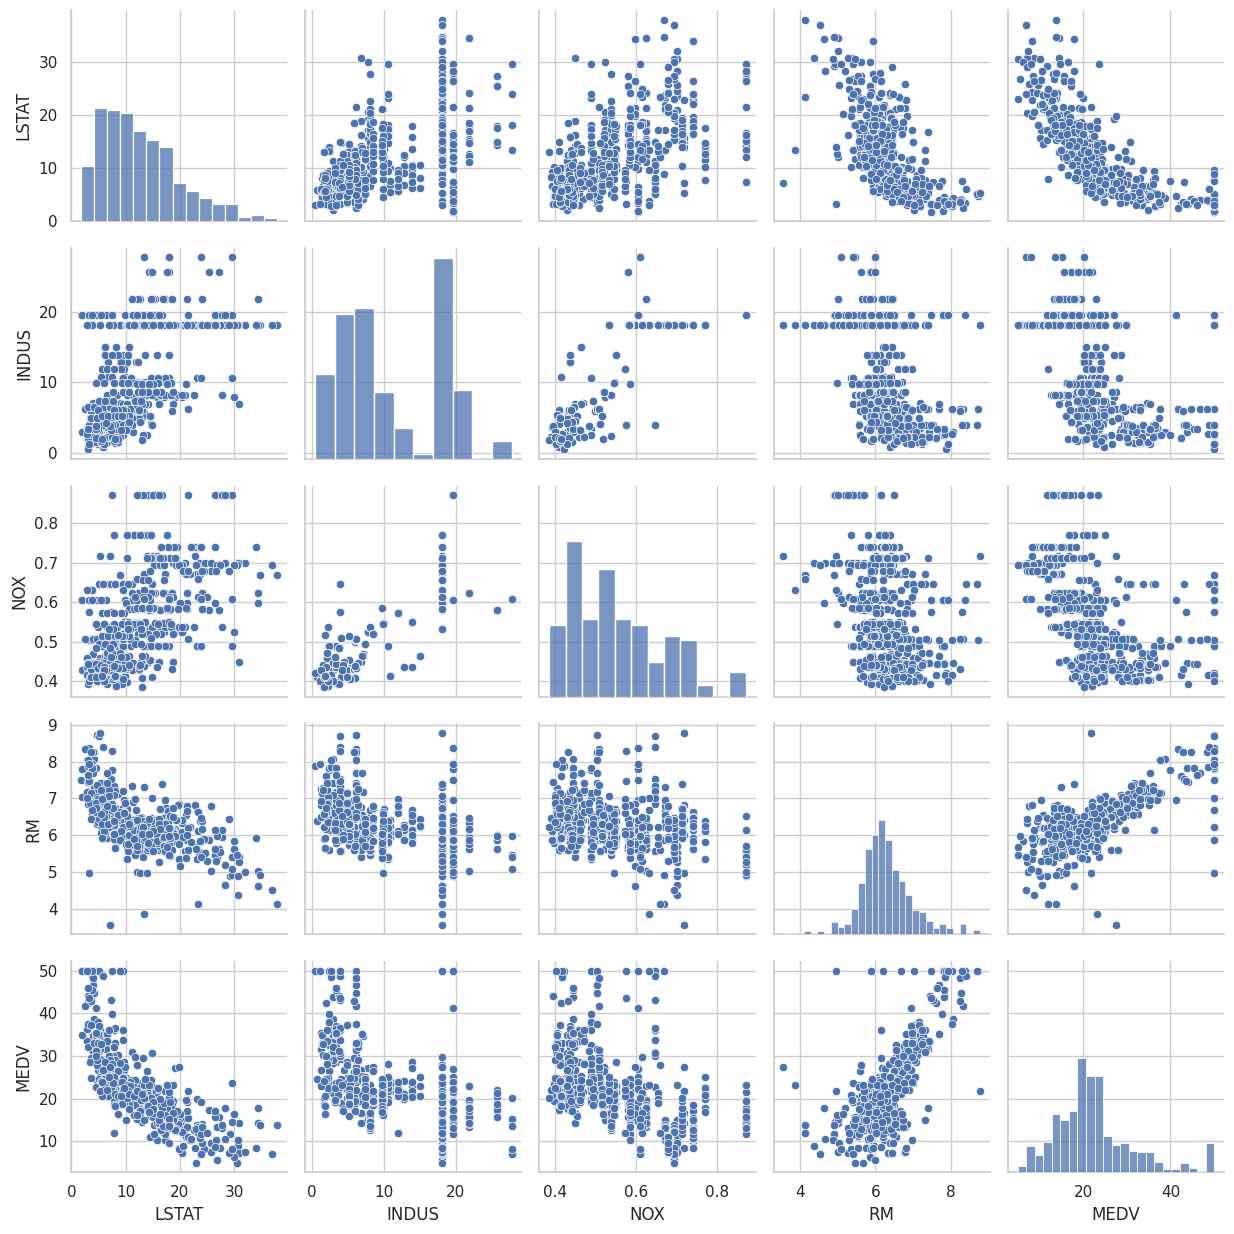

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
# 低收入人群占比、非零售商业用地比例、一氧化氮浓度、每栋房屋平均客房数、同类房屋价格的中位数
sns.pairplot(data=df[cols])
plt.tight_layout()
plt.show()

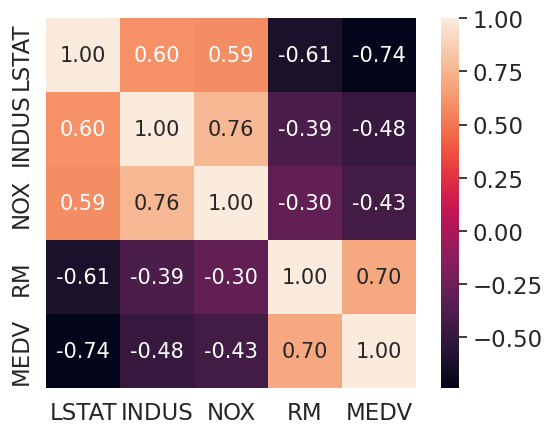

In [4]:
import numpy as np

cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)
plt.show()

In [5]:
sns.reset_orig()

### 用sklearn完成回归并查看系数

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
X = df[['RM']].values  # 每栋房屋平均客房数
y = df['MEDV'].values
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


In [8]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)    
    return 

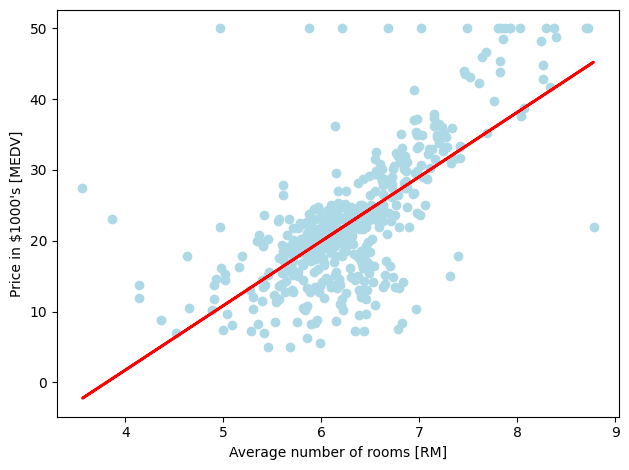

In [9]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.tight_layout()
plt.show()

**Normal Equations** alternative:


$$
\theta=\left(X^T X\right)^{-1} X^T y
$$

- Normal Equation VS Gradient Descent

Normal Equation 跟 Gradient Descent（梯度下降）一样，可以用来求权重向量θ。但它与Gradient Descent相比，既有优势也有劣势。

- 优势：

Normal Equation可以不在意x特征的scale。比如，有特征向量X={x1, x2}, 其中x1的range为`1~2000`，而x2的range为`1~4`，可以看到它们的范围相差了500倍。如果使用Gradient Descent方法的话，会导致椭圆变得很窄很长，而出现梯度下降困难，甚至无法下降梯度（因为导数乘上步长后可能会冲出椭圆的外面）。但是，如果用Normal Equation方法的话，就不用担心这个问题了。因为它是纯粹的矩阵算法。

- 劣势：

相比于Gradient Descent，Normal Equation需要大量的矩阵运算，特别是求矩阵的逆。在矩阵很大的情况下，会大大增加计算复杂性以及对计算机内存容量的要求。



In [10]:
# adding a column vector of "ones"
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))

print('Slope: %.3f' % w[1])
print('Intercept: %.3f' % w[0])

Slope: 9.102
Intercept: -34.671


### 使用sklearn的RANSAC提高鲁棒性

使用 RANSAC（Random Sample Consensus）算法来提高线性回归模型对异常值的鲁棒性。

RANSAC是一种迭代算法，它通过反复选择数据中的一部分子集（称为内点）来拟合模型，并将其他不符合模型的数据点（称为外点）排除在外。

RANSAC算法的工作原理如下：

1. 随机选择：在数据中随机选择一个最小子集，用这个子集拟合模型。

2. 测试所有数据：将所有的数据点代入模型，计算每个数据点的残差（即实际值与预测值的差）。

3. 内点和外点：如果一个数据点的残差小于预设的阈值，那么这个数据点被认为是内点，否则被认为是外点。

4. 迭代：重复步骤1-3，直到达到预设的最大迭代次数。

5. 最优模型：选择内点数量最多的模型作为最优模型。

下面这段代码中，RANSACRegressor类实现了上述算法。它接受一个基础的回归模型（例如LinearRegression()）、最大迭代次数、最小样本数、损失函数和残差阈值作为输入。

fit方法执行了RANSAC算法，inlier_mask_属性返回了内点的布尔掩码，estimator_属性返回了最优的模型。

在给出的代码示例中，使用了RANSAC算法来拟合一个线性回归模型，并将内点和外点绘制在同一张图上。

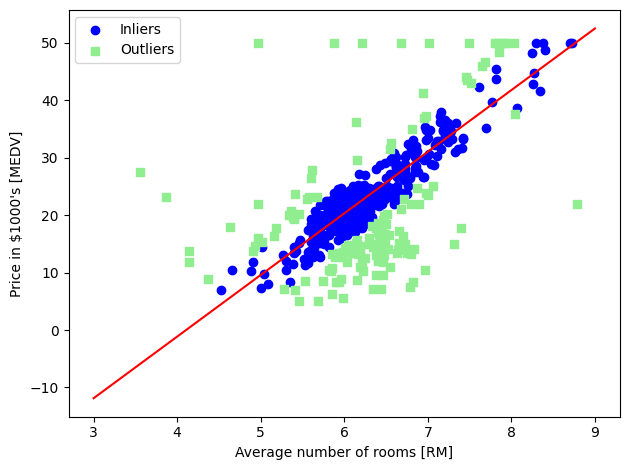

In [11]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         loss='absolute_error',   #'squared_error', 'absolute_error'
                         residual_threshold=5.0, 
                         random_state=0)

ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='lightgreen', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')   
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

- 最优模型的斜率和截距

In [12]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 10.735
Intercept: -44.089


- 这种方法的优点是可以提高模型对异常值的鲁棒性，因为它只使用内点来拟合模型。
- 然而，它的缺点是需要预设一些参数，例如最大迭代次数和残差阈值，这些参数的选择可能会影响模型的性能。

### 评估回归模型的性能

In [13]:
from sklearn.model_selection import train_test_split

# 全部特征都考虑！
X = df.iloc[:, :-1].values  # 所有的特征走你！
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [14]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [15]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196
R^2 train: 0.765, test: 0.673


搞清楚R2_score计算之前, 我们还需要了解几个统计学概念。

<details>
  <summary>点击折叠/展开</summary>
  
若用 $y_i$ 表示真实的观测值, 用 $y^2$ 表示真实观测值的平均值, 用 $\hat{y}_i$ 表示预测值,则:
- 回归平方和：SSR
$$
S S R=\sum_{i=1}^n\left(\hat{y}_i-y^2\right)^2
$$

即估计值与平均值的误差, 反映自变量与因变量之间的相关程度的偏差平方和

- 残差平方和：SSE
$$
S S E=\sum_{i=1}^n\left(y_i-\hat{y}_i\right)^2
$$

即估计值与真实值的误差, 反映模型拟合程度

- 总离差平方和：SST
$$
S S T=S S R+S S E=\sum_{i=1}^n\left(y_i-y^2\right)^2
$$

即平均值与真实值的误差, 反映与数学期望的偏离程度
- R2_score计算公式

`R^2 score`, 即决定系数, 反映因变量的全部变异能通过回归关系被自变量解释的比例。计算公式:
$$
R^2=1-\frac{S S E}{S S T}
$$

即
$$
R^2=1-\frac{\sum_{i=1}^n\left(y_i-\hat{y}_i\right)^2}{\sum_{i=1}^n\left(y_i-y^2\right)^2}
$$

进一步化简
$$
R^2=1-\frac{\sum_i\left(y_i-y_i\right)^2 / n}{\sum_i\left(y_i-\hat{y}\right)^2 / n}=1-\frac{R M S E}{\operatorname{Var}}
$$

分子就变成了常用的评价指标均方误差MSE, 分母就变成了方差。
- 对于 $R^2$ 可以通俗地理解为使用均值作为误差基准, 看预测误差是否大于或者小于均值基准误差。
    - R2_score = 1, 样本中预测值和真实值完全相等, 没有任何误差, 表示回归分析中自变量对因变量的解释越好。
    - R2_score = 0 。此时分子等于分母, 样本的每项预测值都等于均值。
    - R2_score不是r的平方, 也可能为负数(分子>分母), 模型等于盲猜, 还不如直接计算目标变量的平均值。
    
</details>



### 添加正则化部分

In [16]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)  # L1正则化
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

[-0.11311792  0.04725111 -0.03992527  0.96478874 -0.          3.72289616
 -0.02143106 -1.23370405  0.20469    -0.0129439  -0.85269025  0.00795847
 -0.52392362]


In [17]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 20.926, test: 28.876
R^2 train: 0.753, test: 0.653


### 多项式回归与曲线拟合

使用多项式特征进行线性回归以实现曲线拟合。

多项式回归是一种特殊的线性回归，它通过添加原始特征的高次项来拟合非线性关系。

多项式回归的步骤如下：

1. 生成多项式特征：使用PolynomialFeatures类生成原始特征的高次项。在这个例子中，我们生成了二次项（degree=2）。

2. 拟合模型：使用线性回归模型拟合生成的多项式特征。这里，我们使用了LinearRegression类。

3. 预测：对新的数据点进行预测。首先，我们需要对新的数据点生成相同的多项式特征，然后使用拟合的模型进行预测。

在下面的代码中，我们首先对原始特征进行了线性回归，然后对生成的二次特征进行了线性回归。

然后，我们将两种回归的结果绘制在同一张图上进行比较。

In [18]:
# 人造一个数据集，来体会一般
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])[:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

In [22]:
X.shape

(10, 1)

In [20]:
from sklearn.preprocessing import PolynomialFeatures

lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)
X_quad.shape

(10, 3)

In [21]:
X_quad

array([[1.00000e+00, 2.58000e+02, 6.65640e+04],
       [1.00000e+00, 2.70000e+02, 7.29000e+04],
       [1.00000e+00, 2.94000e+02, 8.64360e+04],
       [1.00000e+00, 3.20000e+02, 1.02400e+05],
       [1.00000e+00, 3.42000e+02, 1.16964e+05],
       [1.00000e+00, 3.68000e+02, 1.35424e+05],
       [1.00000e+00, 3.96000e+02, 1.56816e+05],
       [1.00000e+00, 4.46000e+02, 1.98916e+05],
       [1.00000e+00, 4.80000e+02, 2.30400e+05],
       [1.00000e+00, 5.86000e+02, 3.43396e+05]])

`X -> y` vs `X -> X_quad -> y`

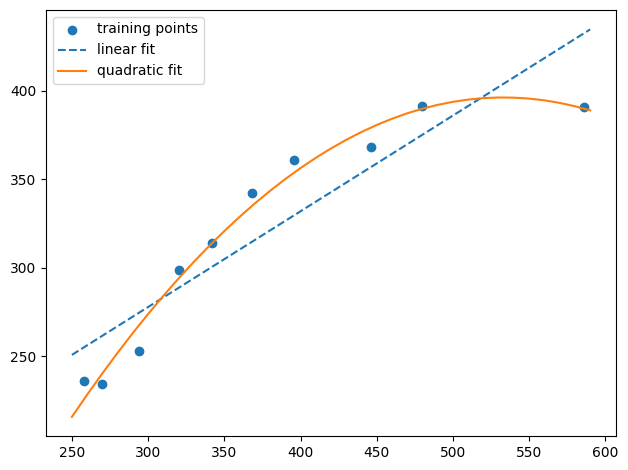

In [23]:
# fit linear features
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis] # 只是为了画条线
y_lin_fit = lr.predict(X_fit)

# fit quadratic features
pr.fit(X_quad, y)    # 使用线性回归模型拟合生成的多项式特征
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))  # 只是为了画条线

# plot results
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

从图中可以看出，二次回归（即多项式回归）比线性回归更好地拟合了数据。

In [24]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

In [25]:
print('Training MSE linear: %.3f, quadratic: %.3f' % (
        mean_squared_error(y, y_lin_pred),
        mean_squared_error(y, y_quad_pred)))
print('Training R^2 linear: %.3f, quadratic: %.3f' % (
        r2_score(y, y_lin_pred),
        r2_score(y, y_quad_pred)))

Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


- 这种方法的优点是可以拟合非线性关系，而且仍然可以使用线性回归的技术（例如正则化）。
- 然而，它的缺点是可能会导致过拟合，特别是当选择的多项式次数过高时。
- 此外，生成的多项式特征可能会导致特征空间的维度急剧增加，从而增加计算的复杂性。

<details>
  <summary>点击折叠/展开</summary>

PolynomialFeatures类用于生成原始特征的高次项和交互项。对于二次多项式（degree=2），生成的特征包括原始特征的平方和两两特征的乘积。

- 如果原始特征只有一个，记为 $x$，那么 PolynomialFeatures 在 degree=2 时会生成以下的二次项特征：

1. 偏置项（Bias term）：$1$。这是一个常数项，对应于线性回归模型中的截距。

2. 原始特征：$x$。这是原始的输入特征。

3. 二次特征：$x^2$。这是原始特征的平方。

所以，如果我们的原始数据是一个特征 $x$ 的向量，那么 PolynomialFeatures 会将其转换为一个包含上述三个特征的特征矩阵：$[1, x, x^2]$。

这样，原始的线性回归模型 $y = w_1x + w_0$ 就被扩展为二次回归模型 $y = w_2x^2 + w_1x + w_0$，其中 $w_2, w_1, w_0$ 是模型的参数，$y$ 是预测值。

- 假设我们有两个原始特征 $x_1$ 和 $x_2$，PolynomialFeatures生成的二次项特征为：

1. 原始特征：$x_1$, $x_2$
2. 原始特征的平方：$x_1^2$, $x_2^2$
3. 两两特征的乘积：$x_1x_2$

所以，对于两个原始特征 $x_1$ 和 $x_2$，PolynomialFeatures生成的特征向量为：

$[1, x_1, x_2, x_1^2, x_1x_2, x_2^2]$

这里，1 是偏置项（也就是 $x_0$），它对应于线性回归模型中的截距项。

- 对于更多的原始特征，PolynomialFeatures会生成所有可能的平方项和交互项。例如，对于三个原始特征 $x_1$，$x_2$ 和 $x_3$，生成的特征向量为：

$[1, x_1, x_2, x_3, x_1^2, x_1x_2, x_1x_3, x_2^2, x_2x_3, x_3^2]$

注意，PolynomialFeatures也可以生成更高次的特征，只需要在创建实例时设置 degree 参数为相应的值即可。

</details>

### 房价数据集的非线性拟合

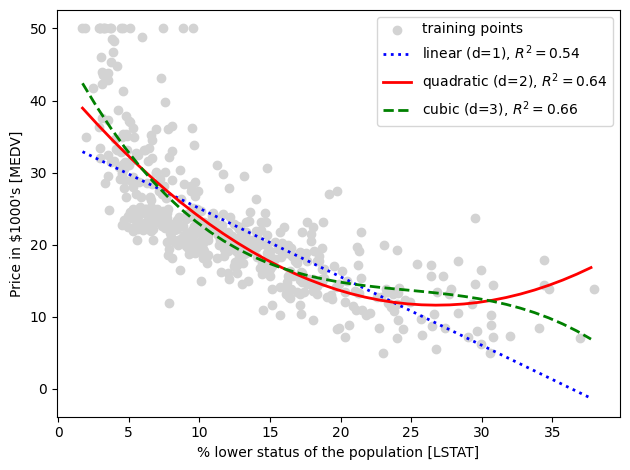

In [26]:
X = df[['LSTAT']].values  # 低收入人群占比
y = df['MEDV'].values

regr = LinearRegression()

# 构建二次与三次特征
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# 拟合特征
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# 绘图
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

- 处理数据集: **特征变换**

对原始特征进行变换，然后使用线性回归模型进行拟合。这是一种常用的方法，可以帮助我们处理非线性关系或者改善模型的性能。

这段代码的步骤如下：

1. 特征变换：对原始特征LSTAT（低收入人群占比）进行**对数变换**，对目标变量MEDV（房价）进行**平方根变换**。这两种变换都可以帮助我们处理偏态分布的数据，使其更接近正态分布。

2. 拟合模型：使用线性回归模型拟合变换后的特征。

3. 预测：对新的数据点进行预测。首先，我们需要对新的数据点进行相同的特征变换，然后使用拟合的模型进行预测。

4. 评估模型：计算模型的决定系数$R^2$，这是一个衡量模型拟合优度的指标。

5. 绘图：将原始数据点和拟合的回归线绘制在同一张图上进行比较。

在这个例子中，我们可以看到，通过对原始特征进行适当的变换，线性回归模型能够更好地拟合数据。这种方法的优点是可以处理非线性关系，而且仍然可以使用线性回归的技术（例如正则化）。然而，它的缺点是需要预设一些参数，例如变换的类型和参数，这些选择可能会影响模型的性能。

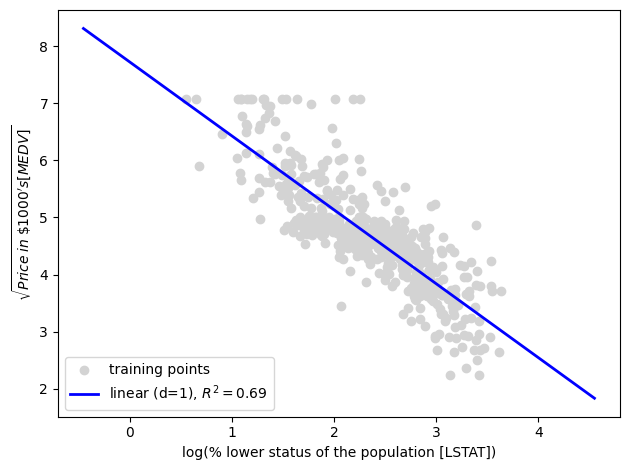

In [38]:
X = df[['LSTAT']].values
y = df['MEDV'].values

# transform features
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# fit features
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# plot results
plt.scatter(X_log, y_sqrt, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000\'s [MEDV]}$')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

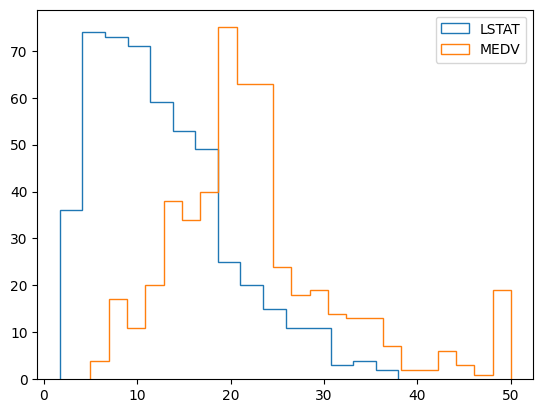

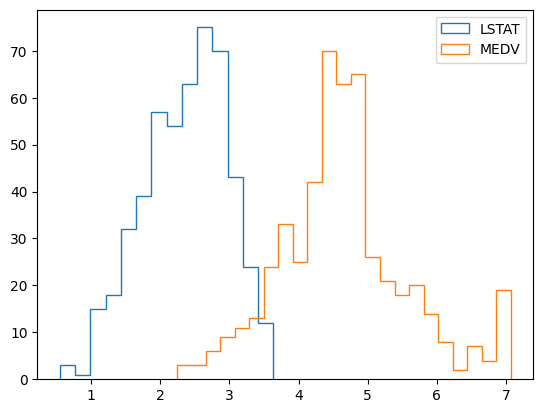

In [37]:
plt.hist(df['LSTAT'].values, bins='auto', histtype='step', label='LSTAT');
plt.hist(df['MEDV'].values, bins='auto', histtype='step', label='MEDV');
plt.legend()
plt.show()

plt.hist(np.log(df['LSTAT'].values), bins='auto', histtype='step', label='LSTAT');
plt.hist(np.sqrt(df['MEDV'].values), bins='auto', histtype='step', label='MEDV');
plt.legend()
plt.show()

### 回归树建模


使用决策树回归模型来拟合数据。

决策树是一种非参数的监督学习方法，它可以用于分类和回归任务。

在回归任务中，决策树通过学习一系列的问题来推断出目标变量的值。

决策树回归的步骤如下：

1. 训练模型：使用DecisionTreeRegressor类创建一个决策树回归器，并使用训练数据X和对应的标签y来训练它。在这个例子中，我们设置了max_depth=3，这意味着决策树的最大深度为3。

2. 预测：使用训练好的决策树回归器对数据进行预测。

3. 绘图：使用lin_regplot函数（绘制数据点和回归线）将原始数据点和决策树的预测结果绘制在同一张图上。

在决策树回归中，每个叶节点的预测结果是该节点上所有样本的平均值。因此，决策树回归的预测结果是分段常数，这在图中表现为阶梯形状的回归线。

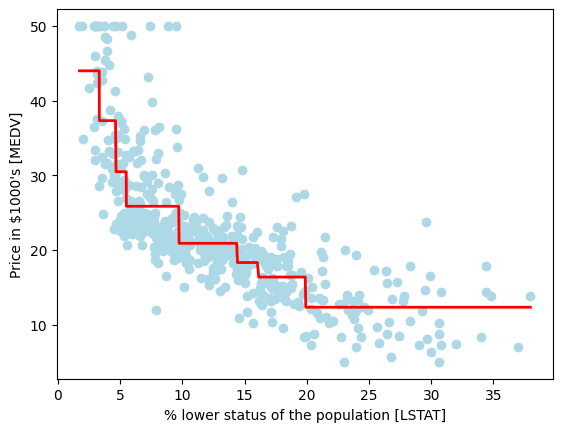

In [39]:
from sklearn.tree import DecisionTreeRegressor

X = df[['LSTAT']].values
y = df['MEDV'].values

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.show()

- 这种方法的优点是可以拟合非线性关系，而且不需要对特征进行变换。
- 然而，它的缺点是可能会过拟合数据，特别是当树的深度过大时。
- 为了防止过拟合，我们通常需要对决策树的深度或叶节点的最小样本数进行限制。

### 随机森林回归建模

使用随机森林回归模型来拟合数据。

随机森林是一种集成学习方法，它通过构建多个决策树并将它们的预测结果进行平均来进行回归或分类。

随机森林回归的步骤如下：

1. 划分数据集：使用train_test_split函数将数据集划分为训练集和测试集。

2. 训练模型：使用RandomForestRegressor类创建一个随机森林回归器，并使用训练数据X_train和对应的标签y_train来训练它。在下面这个例子中，我们设置了n_estimators=1000，这意味着随机森林由1000棵决策树组成。

3. 预测：使用训练好的随机森林回归器对训练集和测试集进行预测。

4. 评估模型：计算模型在训练集和测试集上的均方误差（MSE）和决定系数$R^2$。

5. 绘制残差图：残差图是一种可视化工具，可以帮助我们检查回归模型的误差是否随机分布。在这个图中，我们将预测值作为x轴，残差（即实际值与预测值的差）作为y轴。理想情况下，我们希望看到残差随机分布在x轴的周围，没有明显的模式。

In [40]:
X = df.iloc[:, :-1].values  # 所有特征走你！
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

In [41]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='friedman_mse',   #'poisson', 'friedman_mse', 'squared_error', 'absolute_error'
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 1.642, test: 11.050
R^2 train: 0.979, test: 0.878


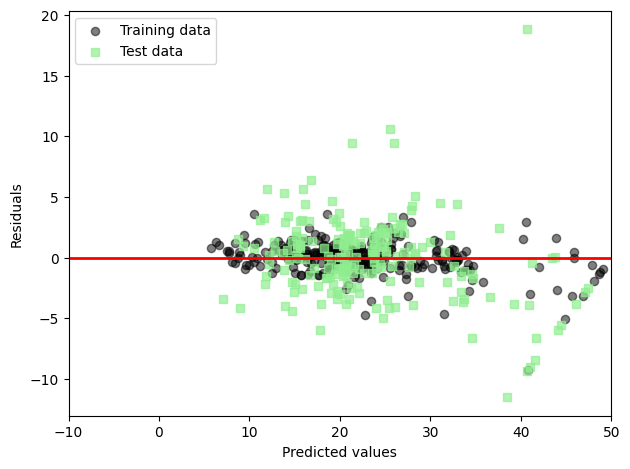

In [42]:
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='black', 
            marker='o', 
            s=35,
            alpha=0.5,
            label='Training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c='lightgreen', 
            marker='s', 
            s=35,
            alpha=0.7,
            label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()

- 随机森林的优点是可以处理非线性关系，而且不需要对特征进行变换。
- 此外，由于它是一个集成方法，所以通常比单一的决策树有更好的性能。
- 然而，它的缺点是模型的解释性不如单一的决策树，因为它的预测结果是多棵决策树的平均结果。